<a href="https://colab.research.google.com/github/jalexcanon/MujeresDigitales/blob/master/Proyecto_Alexandra_Ca%C3%B1%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Clasificación de imagenes con regresión logistica**

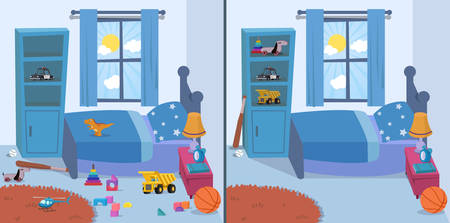

## Dataset Messy vs Clean Room https://www.kaggle.com/cdawn1/messy-vs-clean-room

In [139]:
#importar librerias
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2 
import os 
from random import shuffle
from tqdm import tqdm  
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [ ]:
#archivo .zip generado de la descarga
from google.colab import files
uploaded = files.upload()

Saving archive.zip to archive.zip


In [140]:
#Extracción y subida de los datos a google colab
import zipfile
import io
data = zipfile.ZipFile(io.BytesIO(uploaded['archive.zip']), 'r')
data.extractall()

In [141]:
#guardando los datos contenidos en las carpetas en variables. 
entrenamiento_d= "images/images/train/messy"
entrenamiento_o="images/images/train/clean"
validacion_d="images/images/val/messy"
validacion_o="images/images/val/clean"
tamano= 128

Text(0.5, 1.0, 'Habitación desordenada y ordenada en escala de grises')

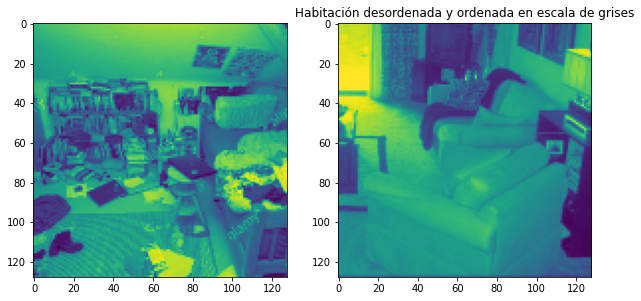

In [142]:
for image in os.listdir(entrenamiento_d):
  path = os.path.join(entrenamiento_d, image)
  h_d= cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
  h_d = cv2.resize(h_d, (tamano, tamano)).flatten()   
  arreglo_d=np.asarray(h_d)
for imagen_2 in os.listdir(entrenamiento_o): 
  path = os.path.join(entrenamiento_o, imagen_2)
  h_o = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
  h_o = cv2.resize(h_o, (tamano, tamano)).flatten() 
  arreglo_o=np.asarray(h_o)
plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.imshow(arreglo_d.reshape(tamano, tamano))
plt.subplot(1, 2, 2)
plt.imshow(arreglo_o.reshape(tamano, tamano))
plt.title("Habitación desordenada y ordenada en escala de grises")

In [143]:
def datos_entrenamiento():
    datos_entrenamiento_d = [] 
    datos_entrenamiento_o =[]
    for image_1 in os.listdir(entrenamiento_d): 
        path = os.path.join(entrenamiento_d, image)
        h_d2 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        h_d2 = cv2.resize(h_d2, (tamano, tamano))
        datos_entrenamiento_d.append(h_d2) 
    for image_2 in os.listdir(entrenamiento_o): 
        path = os.path.join(entrenamiento_o, image)
        h_o2= cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        h_o2 = cv2.resize(h_o2, (tamano, tamano))
        datos_entrenamiento_o.append(h_o2) 
    
    datos_entrenamiento= np.concatenate((np.asarray(datos_entrenamiento_d),np.asarray(datos_entrenamiento_o)),axis=0)
    return datos_entrenamiento 

In [144]:
def datos_validacion():
    datos_validacion_d = [] 
    datos_validacion_o =[]
    for i in os.listdir(validacion_d): 
        path = os.path.join(validacion_d, i)
        h_d3 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        h_d3 = cv2.resize(h_d3, (tamano, tamano))
        datos_validacion_d.append(h_d3) 
    for j in os.listdir(validacion_o): 
        path = os.path.join(validacion_o, j)
        h_o3 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        h_o3 = cv2.resize(h_o3, (tamano, tamano))
        datos_validacion_o.append(h_o3) 
    
    datos_validacion= np.concatenate((np.asarray(datos_validacion_d),np.asarray(datos_validacion_o)),axis=0) 
    return datos_validacion 

In [145]:
d_entrenamiento = datos_entrenamiento()
d_validacion = datos_validacion()

In [146]:
x= np.concatenate((d_entrenamiento,d_validacion),axis=0)
x= (x-np.min(x))/(np.max(x)-np.min(x))

In [147]:
z = np.zeros(96)
o = np.ones(96)
o_z = np.concatenate((o, z), axis=0)
a = np.zeros(10)
b = np.ones(10)
a_b = np.concatenate((b, a), axis=0)
y_data=np.concatenate((o_z,a_b),axis=0).reshape(x.shape[0],1)

In [148]:
x_train, x_test, y_train, y_test = train_test_split(x, y_data, test_size=0.15, random_state=42)
n_train = x_train.shape[0]
n_test = x_test.shape[0]

In [149]:
x_train_flatten = x_train.reshape(n_train,x_train.shape[1]*x_train.shape[2])
x_test_flatten = x_test .reshape(n_test,x_test.shape[1]*x_test.shape[2])
print("X train flatten",x_train_flatten.shape)
print("X test flatten",x_test_flatten.shape)

X train flatten (180, 16384)
X test flatten (32, 16384)


In [150]:
x_train = x_train_flatten.T
x_test = x_test_flatten.T
y_test = y_test.T
y_train = y_train.T
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (16384, 180)
x test:  (16384, 32)
y train:  (1, 180)
y test:  (1, 32)


In [157]:
def inicializar(d):
    w = np.full((d,1),0.01)
    b = 0.0
    return w, b

def funcion_sigmoide(s):
    y = 1/(1+np.exp(-s))
    return y

def propagacion(w,b,x_train,y_train):
    s = np.dot(w.T,x_train) + b
    y = funcion_sigmoide(s)
    loss = -y_train*np.log(y)-(1-y_train)*np.log(1-y)
    cost = (np.sum(loss))/x_train.shape[1]
    derivative_weight = (np.dot(x_train,((y-y_train).T)))/x_train.shape[1]
    derivative_bias = np.sum(y-y_train)/x_train.shape[1]
    gradients = {"derivative_weight": derivative_weight,"derivative_bias": derivative_bias}
    return cost,gradients

def update(w, b, x_train, y_train, l_r, iteraciones):
    list_1 = []
    list_2 = []
    index = []
    
    for i in range(iteraciones):
        
        cost,gradients = propagacion(w,b,x_train,y_train)
        list_1.append(cost)
        
        w = w - l_r * gradients["derivative_weight"]
        b = b - l_r * gradients["derivative_bias"]
        if i % 100 == 0:
            list_2.append(cost)
            index.append(i)
        
    parameters = {"weight": w,"bias": b}
    plt.plot(index,list_2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Iteraciones")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, list_1

def predict(w,b,x_test):
    
    s = funcion_sigmoide(np.dot(w.T,x_test)+b)
    Y_prediction = np.zeros((1,x_test.shape[1]))

    for i in range(s.shape[1]):
        if s[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction

def logistic_regression(x_train, y_train, x_test, y_test, l_r , iteraciones):

    dimension =  x_train.shape[0]
    w,b = inicializar(dimension)

    parameters, gradients, cost_list = update(w, b, x_train, y_train, l_r,iteraciones)
    
    y_prediction_test = predict(parameters["weight"],parameters["bias"],x_test)
    y_prediction_train = predict(parameters["weight"],parameters["bias"],x_train)
    
    print("Exactitud - Test: {} %".format(round(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100,2)))
    print("Exactitud - Train: {} %".format(round(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100,2)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in multiply
  del sys.path[0]


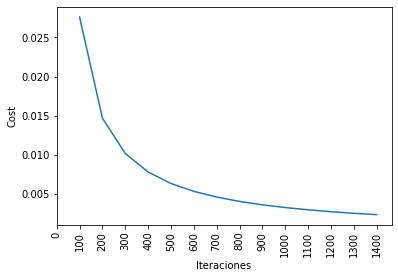

Exactitud - Test: 93.75 %
Exactitud - Train: 100.0 %


In [160]:
logistic_regression(x_train, y_train, x_test, y_test,l_r = 0.01, iteraciones = 1500)